# In questo script recupero informazioni relative alla dispersione di soglia dei FE RD53A e RD53B

Devo prendere i valori al 50% dello scan di soglia e calcolare la varianza della sua distribuzione. Infine, plottare l'andamento delle disperioni di soglia delle misurazioni fatte in funzione della corrente $I_{LDAC}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

In [39]:
button1 = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_8_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_10_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_12_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_13_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_14_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_16_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_18_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/calib_I_LDAC_20_0_soglia_1000_elettroni.txt


In [40]:
data1 = parseCalibs(button1.files) #ad ogni file è associato un dataframe               

8 dataframe crated!


## Dispersione di soglia in funzione di $I_{LDAC}$ dopo il tuning

Sono presenti outliers

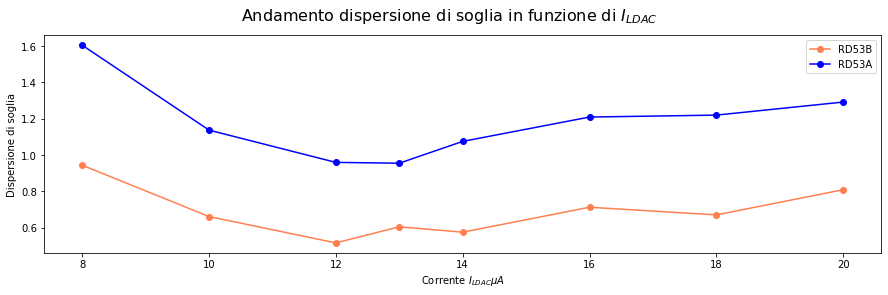

In [50]:
varianzeB = []
varianzeA = []
correnti = [8.0, 10.0, 12.0, 13.0, 14.0, 16.0, 18.0, 20.0]

for i in range(0, len(data1)):
    F = data1[i][0]
    G = F.loc[F['Tipo'] == 'B']
    H = np.asarray(G['Thresholds'].values.tolist())
    
    varianzeB.append(np.std(H))
    
    I = F.loc[F['Tipo'] == 'A']
    J = np.asarray(I['Thresholds'].values.tolist())
    varianzeA.append(np.std(J))



fig, ax = plt.subplots(figsize = (15,4))

fig.suptitle("Andamento dispersione di soglia in funzione di $I_{LDAC}$ ", fontsize=16)
ax.set_ylabel("Dispersione di soglia")
ax.set_xlabel("Corrente $I_{LDAC} \mu A$")

ax.plot(correnti, varianzeB, '-o', color = 'coral', label="RD53B")
ax.plot(correnti, varianzeA, '-o', color = 'blue', label="RD53A")

ax.legend(loc="upper right")

#plt.xticks(np.arange(8, 20, 0.5))
#plt.savefig('disp.png', bbox_inches='tight')
plt.show()